# Unit 5 - Financial Planning

In [113]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
type(alpaca_api_key)


str

In [5]:
type(alpaca_secret_key)

str

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
crypto = ("BTC", "ETH")
my_btc = 1.2
my_eth = 5.3
crypto_amount = (my_btc, my_eth)

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [8]:
# Execute get request
request_btc_data = requests.get(btc_url).json()

In [9]:
# Output data
request_btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18732418,
   'total_supply': 18732418,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 36953.0,
     'volume_24h': 36441368323,
     'market_cap': 691786195607,
     'percentage_change_1h': 0.744212265565814,
     'percentage_change_24h': 0.910210337049604,
     'percentage_change_7d': -5.61549771117194,
     'percent_change_1h': 0.744212265565814,
     'percent_change_24h': 0.910210337049604,
     'percent_change_7d': -5.61549771117194},
    'CAD': {'price': 44986.5822,
     'volume_24h': 44363721796.4202,
     'market_cap': 842180514531.962,
     'percent_change_1h': 0.744212265565814,
     'percent_change_24h': 0.910210337049604,
     'percent_change_7d': -5.61549771117194}},
   'last_updated': 1623433465}},
 'metadata': {'timestamp': 1623433465,
  'num_cryptocurrencies': 1291,
  'error': None}}

In [10]:
btc_price = request_btc_data["data"]['1']['quotes']['CAD']['price']
print(btc_price)

44986.5822


In [11]:
# Fetch current ETH price
# Execute get request
request_eth_data = requests.get(eth_url).json()

# Output data
request_eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 116249872,
   'total_supply': 116249872,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2407.7,
     'volume_24h': 27353530129,
     'market_cap': 279595681336,
     'percentage_change_1h': 0.941448800732371,
     'percentage_change_24h': -2.81200278331828,
     'percentage_change_7d': -15.7638505801354,
     'percent_change_1h': 0.941448800732371,
     'percent_change_24h': -2.81200278331828,
     'percent_change_7d': -15.7638505801354},
    'CAD': {'price': 2931.13398,
     'volume_24h': 33300187579.0446,
     'market_cap': 340379782458.446,
     'percent_change_1h': 0.941448800732371,
     'percent_change_24h': -2.81200278331828,
     'percent_change_7d': -15.7638505801354}},
   'last_updated': 1623433440}},
 'metadata': {'timestamp': 1623433440,
  'num_cryptocurrencies': 1291,
  'error': None}}

In [12]:
eth_price = request_eth_data["data"]['1027']['quotes']['CAD']['price']
print(eth_price)

2931.13398


In [13]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(f" BTC value is {my_btc_value}")
print(f" ETH value is {my_eth_value}")

 BTC value is 53983.89863999999
 ETH value is 15535.010094


In [14]:

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
crypto_value = (my_btc_value, my_eth_value)
crypto_value

The current value of your 1.2 BTC is $53983.90
The current value of your 5.3 ETH is $15535.01


(53983.89863999999, 15535.010094)

In [15]:
#creating crypto dataframe
crypto_portfolio = []
data_crypto = {'Crypto':crypto, 'Amount' : crypto_amount, 'Value' : crypto_value}
crypto_portfolio = pd.DataFrame(data=data_crypto)
print(crypto_portfolio)
crypto_value = crypto_portfolio['Value'].sum()
crypto_value

  Crypto  Amount         Value
0    BTC     1.2  53983.898640
1    ETH     5.3  15535.010094


69518.908734

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares

my_agg = 200
my_spy = 50
shares=(my_agg, my_spy)
shares

(200, 50)

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-04", tz="America/New_york").isoformat()
end_date = pd.Timestamp("2021-06-04", tz="America/New_york").isoformat()

In [19]:
# Set the tickers
tickers = ["AGG", "SPY"]


In [20]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [21]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
    ).df


In [98]:
# Preview DataFrame
df_portfolio.tail()


AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2021-05-28 00:00:00-04:00  114.55  114.68  114.500  114.510  6186451  420.97   
2021-06-01 00:00:00-04:00  114.40  114.40  114.164  114.340  5655159  422.57   
2021-06-02 00:00:00-04:00  114.45  114.51  114.300  114.485  5649317  420.37   
2021-06-03 00:00:00-04:00  114.31  114.46  114.210  114.210  3270096  417.87   
2021-06-04 00:00:00-04:00  114.39  114.67  114.220  114.665  4334878  420.75   

                                                               
                             high       low   close    volume  
time                                                           
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328  
2021-06-01 00:00:00-04:00  422.72  419.2000  419.63  47607950  
2021-06-02 00:00:00-04:00  421.23  419.2900  420.38  41250387  
2021-06-03 00:00:00-04:00  419.99  416.2800  418.86  51582905  
2021-06-04 00:00:00-04:00  422.92  418.8422  422.57  45129316

In [23]:
# Pick AGG and SPY close prices

# picking the last row in the dataframe
df_last = df_portfolio.iloc[-1]
print(f" The last row is \n{df_last}\n")

# picking the 3rd column and 8th column value for AGG and SPY closing price
agg_close_price = df_last.iloc[3]
spy_close_price = df_last.iloc[8]


 The last row is 
AGG  open      1.143900e+02
     high      1.146700e+02
     low       1.142200e+02
     close     1.146650e+02
     volume    4.334878e+06
SPY  open      4.207500e+02
     high      4.229200e+02
     low       4.188422e+02
     close     4.225700e+02
     volume    4.512932e+07
Name: 2021-06-04 00:00:00-04:00, dtype: float64



In [24]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.665
Current SPY closing price: $422.57


In [25]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

my_value = (my_agg_value, my_spy_value)
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21128.50
The current value of your 200 AGG shares is $22933.00


In [26]:
# creating a datafrom for the portfolio
share_portfolio = []
data_shares={'Ticker' : tickers, 'Shares' : shares, 'Share value' : my_value }
share_portfolio = pd.DataFrame(data=data_shares)
print(share_portfolio)
share_value = share_portfolio['Share value'].sum()
share_value

  Ticker  Shares  Share value
0    AGG     200      22933.0
1    SPY      50      21128.5


44061.5

### Savings Health Analysis

In [102]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets_df = [] 

# Create savings DataFrame
df_savings = []
save_type = ("crypto","shares")
save_amt = (crypto_value, share_value)
data_savings = {'Type' : save_type , 'Amount' : save_amt}
df_savings = pd.DataFrame(data=data_savings, index=["crypto","shares"])


In [106]:
# Display savings DataFrame
df_savings = df_savings.drop(columns=['Type'])
display(df_savings)


,Amount
crypto,69518.908734
shares,44061.500000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

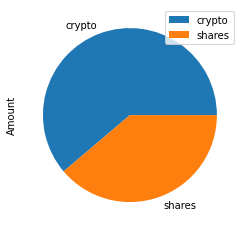

In [119]:
# Plot savings pie chart
#y=df_savings["Amount"]
#mylabels = ["Crypto" , "Shares"]
mycolors = ["b", "hotpink"]
explode = (0, 0.1)

df_savings.plot.pie(subplots=True)

#df_savings.plot.pie(y, colors = mycolors, shadow=True, radius=1.75, autopct='%1.1f%%', explode=explode)

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


In [31]:
# Calculate total amount of savings
savings_amount= df_savings["Amount"].sum()
savings_amount


113580.408734

In [32]:
# Validate saving health
savings_amount > emergency_fund
print("Congratulations ! You have enough money in your emergency fund")

Congratulations ! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [73]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [75]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
    ).df


In [76]:
# Display sample data
df_stock_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-10 00:00:00-04:00  108.60  108.6600  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
...                           ...       ...       ...      ...        ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765.0   

                              SPY                                         
                             open    high       low    close      volume  
time                                                                      
2017-05-10 00:00:00-04:00     NaN     NaN       NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.1300  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.6700  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.4500  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.6300  240.100  37206183.0  
...                           ...     ...       ...      ...         ...  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.640  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.480  45962264.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.350  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.990  70607144.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.300  73129109.0  

[1001 rows x 10 columns]

In [36]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# setting number if simulations
num_sims = 500


In [122]:
# Printing the simulation input data
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)
MC_30years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [77]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002210,0.994105,0.993185,0.997786,1.008249,0.995728,1.007412,1.000186,1.005280,1.002653,...,0.998065,1.000036,0.993769,1.013694,0.998154,1.005282,0.984631,1.008075,1.007749,0.985118
2,1.015531,0.984462,0.998700,1.001170,1.011571,0.986095,1.022933,1.003093,1.000751,0.993797,...,0.994747,1.009327,0.989154,1.018655,1.005695,1.015207,0.988160,1.002372,0.995334,0.983369
3,1.025196,0.982191,0.990610,0.991072,1.013421,1.002933,1.021807,1.013944,1.001841,0.991513,...,0.994264,1.010001,0.994978,1.009405,0.989425,1.004818,0.989901,0.982728,0.998691,0.982743
4,1.034978,0.976904,0.980737,0.990393,1.005443,1.009007,1.018310,1.012710,0.977647,1.008458,...,0.994753,1.009503,0.997023,1.015192,0.979855,1.001349,0.993855,0.985768,1.010540,0.986280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.033595,31.865806,22.816245,10.328017,35.160975,26.687020,12.649311,31.993452,23.159273,11.562682,...,6.031337,20.715608,17.624426,4.207317,18.578285,42.530869,69.320834,7.302373,13.070658,12.731820
7557,11.042491,32.034480,22.939499,10.528913,34.990312,26.298000,12.709329,31.876717,23.285756,11.662434,...,5.937368,20.950757,17.730677,4.241018,18.309088,42.862081,69.006506,7.277153,13.160714,12.564630
7558,11.112475,31.918332,23.166620,10.494859,35.566825,26.260972,12.658745,31.973739,23.208226,11.792944,...,5.978952,20.825238,18.029442,4.248247,18.322110,42.632615,69.161108,7.309279,13.064884,12.616988
7559,11.099401,31.194525,23.337908,10.549768,35.615741,26.287434,12.650359,32.186708,23.398165,11.881209,...,6.033148,20.868403,17.850448,4.206460,18.546904,42.951512,69.254748,7.381959,13.018272,12.742395


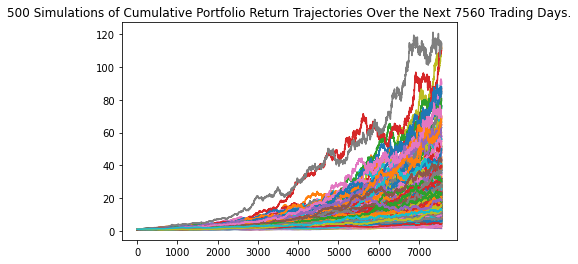

In [78]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()


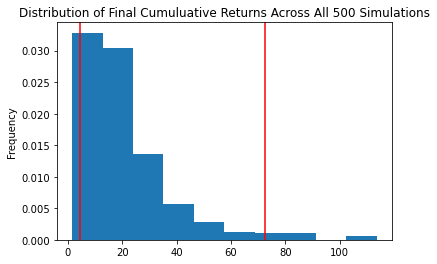

In [79]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [81]:
# Fetch summary statistics from the Monte Carlo simulation results
portfolio_tbl = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(portfolio_tbl)

count           500.000000
mean             21.200706
std              17.006400
min               1.515328
25%              10.650959
50%              16.037967
75%              25.770468
max             113.565406
95% CI Lower      4.521035
95% CI Upper     72.587984
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [82]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(portfolio_tbl[8] * initial_investment,2)
ci_upper = round(portfolio_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90420.7 and $1451759.68


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [83]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(portfolio_tbl[8] * initial_investment,2)
ci_upper = round(portfolio_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135631.05 and $2177639.52


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [84]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [0.40, 0.60],
    num_trading_days = 252*5
)


In [85]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000438,1.001393,0.991073,1.001583,0.999517,1.011798,1.020695,1.007717,1.004022,0.995928,...,1.002668,0.986735,0.995728,1.006627,1.016080,1.009525,1.015657,1.002872,0.986265,0.991682
2,0.995127,1.012712,0.991847,1.008541,1.004968,1.011766,1.019115,1.003176,1.002732,0.996819,...,1.008282,0.992316,1.015582,1.000359,1.011123,1.023073,1.011211,1.004783,0.988645,0.973995
3,0.992179,1.012652,0.989337,1.014756,1.016813,1.010404,1.030432,1.000457,0.998768,1.006566,...,0.999564,1.003685,1.020196,0.981203,1.009938,1.019205,1.014904,1.015674,0.981922,0.984698
4,1.008572,1.005553,0.990888,1.017911,1.017011,1.009468,1.027718,0.999827,0.989460,1.012117,...,1.002434,0.990153,1.015186,0.985058,1.002274,1.033980,1.016600,1.021580,0.977216,0.991200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.616996,1.196068,1.214568,1.524331,1.278457,1.614214,2.445325,1.135657,2.200587,1.880518,...,1.103514,1.345721,2.116751,1.344401,1.538115,1.264815,1.270394,1.945035,1.380961,1.834639
1257,1.619200,1.204119,1.200347,1.507702,1.282268,1.615110,2.474551,1.140951,2.208924,1.861130,...,1.099650,1.340920,2.106737,1.327581,1.534905,1.276553,1.259684,1.964419,1.385126,1.873148
1258,1.613787,1.201217,1.199177,1.497754,1.279760,1.642934,2.461800,1.143517,2.210188,1.855697,...,1.092565,1.342201,2.115755,1.330865,1.543623,1.281673,1.246121,1.954054,1.399117,1.852045
1259,1.584055,1.197962,1.221701,1.506864,1.296761,1.643081,2.480898,1.159391,2.197826,1.847140,...,1.097219,1.341689,2.119793,1.346159,1.537183,1.299807,1.261139,1.948780,1.400608,1.852542


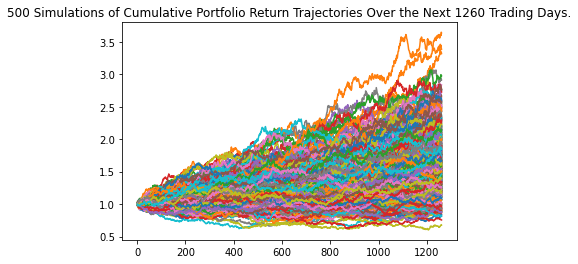

In [86]:
# Plot simulation outcomes
line_plot_5years = MC_5years.plot_simulation()

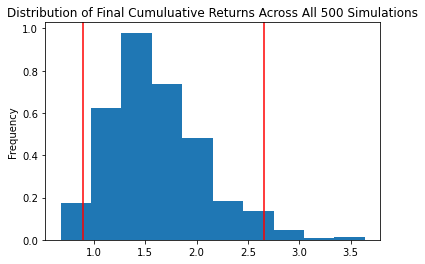

In [87]:
# Plot probability distribution and confidence intervals
dist_plot_5years = MC_5years.plot_distribution()

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_5years_tbl = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MC_5years_tbl)

count           500.000000
mean              1.611848
std               0.454813
min               0.677266
25%               1.296181
50%               1.534883
75%               1.874596
max               3.637338
95% CI Lower      0.900026
95% CI Upper      2.653771
Name: 1260, dtype: float64


In [89]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_5years_tbl[8] * initial_investment,2)
ci_upper_five = round(MC_5years_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54001.56 and $159226.25


### Ten Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights = [0.40, 0.60],
    num_trading_days = 252*10
)

In [93]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010572,0.997195,0.990150,0.998479,0.997003,1.009110,1.010551,1.010949,0.985542,1.001272,...,0.997271,0.994633,0.997043,0.999265,0.983037,1.009928,0.993773,0.980820,1.011114,0.996319
2,0.984871,0.995788,1.004146,0.997754,1.007594,1.008873,1.015215,1.012153,0.969815,0.996254,...,0.988911,1.000019,1.002238,1.003567,0.980872,1.005204,0.987629,0.975656,1.038854,1.001996
3,0.973322,0.995161,1.004993,1.005757,1.003833,1.007866,1.024856,1.020489,0.965345,1.011542,...,0.990165,1.001853,0.998193,1.000965,0.987377,1.008215,0.977535,0.982364,1.026775,1.000426
4,0.965058,0.977484,1.011811,1.007574,0.991030,1.005815,1.026054,1.028264,0.967689,1.024363,...,0.990265,0.989981,0.990897,1.008028,0.989977,1.015893,0.974030,0.982710,1.033945,0.994967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.807304,1.970613,3.023706,3.707877,2.043035,1.794200,1.397221,1.458970,2.055375,7.256930,...,1.491534,2.380984,2.245292,2.436929,1.591141,3.513661,2.291759,1.686249,2.788840,2.287296
2517,1.810728,1.951570,3.031293,3.707279,2.044438,1.775509,1.396362,1.452042,2.049058,7.254733,...,1.494840,2.369990,2.225771,2.416708,1.603158,3.595554,2.284831,1.684905,2.744755,2.276793
2518,1.799528,1.951656,2.982120,3.696485,2.025331,1.805235,1.394606,1.457617,2.040251,7.212775,...,1.494665,2.369707,2.229373,2.417709,1.573041,3.633380,2.286511,1.681664,2.752380,2.287534
2519,1.809157,1.938927,2.954281,3.723907,2.025650,1.815148,1.391355,1.450032,2.019928,7.272152,...,1.501295,2.362354,2.259676,2.437302,1.598352,3.641194,2.258440,1.692168,2.735321,2.280331


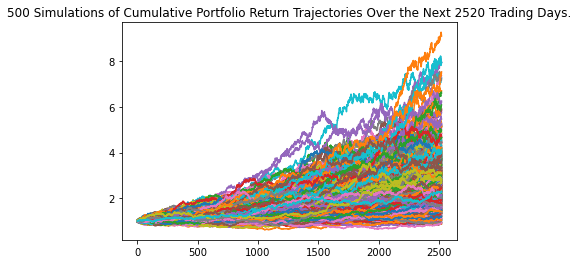

In [94]:
# Plot simulation outcomes
line_plot_10years = MC_10years.plot_simulation()

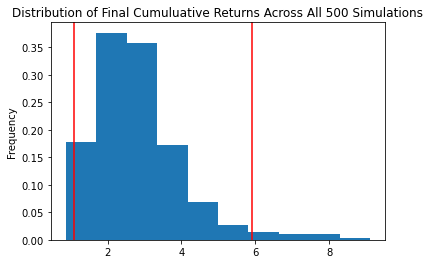

In [95]:
# Plot probability distribution and confidence intervals
dist_plot_10years = MC_10years.plot_distribution()

In [96]:

# Fetch summary statistics from the Monte Carlo simulation results
MC_10years_tbl = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MC_10years_tbl)

count           500.000000
mean              2.816102
std               1.216978
min               0.871426
25%               1.984455
50%               2.626378
75%               3.338339
max               9.106726
95% CI Lower      1.105246
95% CI Upper      5.896309
Name: 2520, dtype: float64


In [97]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_10years_tbl[8] * initial_investment,2)
ci_upper_ten = round(MC_10years_tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66314.74 and $353778.55
